In [1]:
# !pip install mglearn
import mglearn
import sklearn
sklearn.__version__

'0.22.1'

# 지도학습 - 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가, bias는 감소 -> Overfitting 발생

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함
- Overfitting 문제 해결 : 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소


학습을 시킬수록 (=모델 복잡도가 올라갈 수록) Bias(편향)은 줄어드나(↓)  Variance(분산)는 올라간다(↑)

학습이 덜될수록 (=모델 복잡도가 낮을수록) Bias(편향)은 올라가나(↑) Variance(분산)는 내려간다(↓)


|구분| 모델 복잡도| 적합성|
|---|---|---|
|Bias 오차가 낮은 & Variance 오차가 높은|복잡| 과대적합(over fitting)|
 |Bias 오차가 높은 Variance 오차가 낮은| 단순| 과소적합(under fitting)|

* Bias(편향) 에러가 높아지는 것은  많은 데이터를 고려하지 않아 (=모델이 너무 단순)  정확한 예측을 하지 못하는 경우

* Variance(분산) 에러는 노이즈까지 전부 학습하여 (=모델이 너무 복잡) 약간의 input에도 예측 Y 값이 크게 흔들리는 것

이 두가지 에러가 상호 Trade-off 관계에 있어서 이 둘을 모두 잡는 것은 불가능 한 딜레마가 발생

정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=red>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=red>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font>


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 -> 가중치에 대한 제곱의 합을 사용
- <font  color=blue>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=red> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=blue>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

> \\( cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) \\)

> MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 Bias(편향)는 증가하고 Variance(분산)는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=blue>bias을 약간 손해보면서 Variance를 크게 줄여</font> 성능의 향상
- 단점 : <font  color=blue>몇몇 변수가 중요하더라도 모든 변수에 대해 적합 해야 하고 완벽한 0은 나오지 않음</font> -> 예측의 문제가 아니라 해석의 문제

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [3]:
# 확장 보스턴 집값
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
mode_lr = LinearRegression().fit(X_train, y_train)

In [4]:
# 훈련 세트 점수
mode_lr.score(X_train, y_train)

0.952051960903273

In [5]:
# 테스트 세트 점수
mode_lr.score(X_test, y_test)

0.6074721959665708

- 훈련 셋에 비해 테스트 셋의 경우 정확도가 많이 떨어짐 -> 과대적합

확장 보스턴 집값 셋에 릿지회귀 적용

In [6]:
# model_ridge
model_ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [7]:
# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [8]:
# model_ridge_alpha_01
model_ridge_alpha_01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_alpha_01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge_alpha_01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


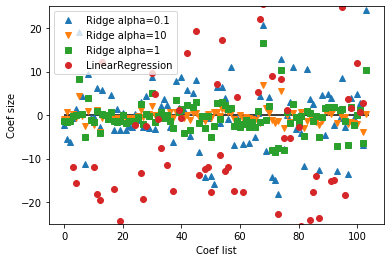

In [9]:
# α 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_ridge_alpha_01.coef_, '^', label='Ridge alpha=0.1')
plt.plot(model_ridge_alpha_10.coef_, 'v', label='Ridge alpha=10')
plt.plot(model_ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(mode_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(mode_lr.coef_))

plt.xlabel("Coef list") # 가중치(w) 목록
plt.ylabel("Coef size") # 가중치(w) 값

plt.ylim(-25, 25)
plt.legend()

- x 축은 coef_의 원소를 위치대로 나열한 것 (x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수로 x=100까지 계속)
- y 축은 각 계수의 수치

- alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1일 때 Ridge 모델의 계수는 좀 더 증가
- alpha=0.1일 때 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감.

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용

> \\(  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} \\)


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [10]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso.coef_ != 0 )   ))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [11]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
# lasso001
model_lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso001.coef_ != 0 )   ))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [12]:
# lasso00001
model_lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso00001.coef_ != 0 )   ))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


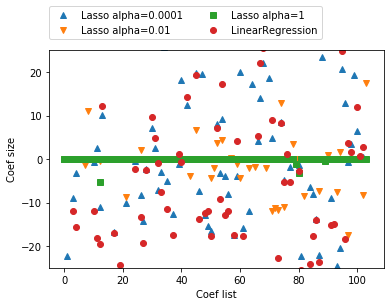

In [13]:
# α 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_lasso00001.coef_, '^', label='Lasso alpha=0.0001')
plt.plot(model_lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(mode_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(mode_lr.coef_))

plt.xlabel("Coef list") # 가중치(w) 목록
plt.ylabel("Coef size") # 가중치(w) 값

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

- alpha=1일 때 가중치가 대부분 0
- alpha=0.01이면 0이 되는 특성이 약간 감소
- alpha=0.0001이면 규제가 약해져서 값도 커짐

- alpha=0.1인 리지 회귀는 alpha=0.01인 라쏘 회귀와 성능이 비슷하지만 리지 회귀를 사용하면 어떤 계수도 0이 되지 않음.

- 보통 리지 회귀를 주로 사용하지만 특성이 많고 그 중 일부분만 사용하고자 한다면 라쏘가 좋은 선택

## ElasticNet Regression

- 선형 회귀에 2가지 규제항 (L1 규제항, L2 규제항)을 추가한 것

> \begin{align}
cost(W,b)\\ 
& =MSE+규제항\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:가중치의개수,α:규제의정도) \end{align}

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- l1_ratio : L1 규제의 비율 (혼합비율?)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

## 다항회귀

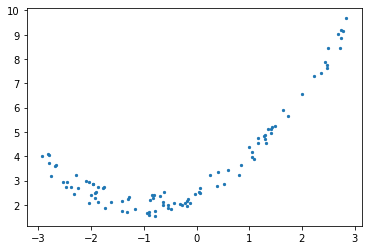

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [16]:
x[0], x_poly[0]

(array([-2.75362279]), array([-2.75362279,  7.58243846]))

In [17]:
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[1.00203573, 0.50957841]]), array([2.48648857]))

In [18]:
# make_pipeline
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)
model_lr.steps

[[1.00203573 0.50957841]]


[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

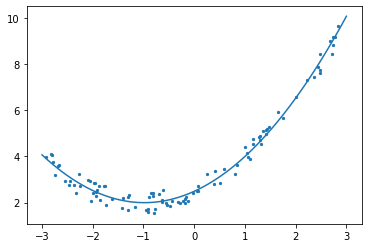

In [19]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

## Linear / Ridge / Lasso / ElasticNet Regression의 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

In [20]:
# 데이터 생성
import numpy as np
import pandas as pd
import seaborn as sb

def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    Y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, Y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfY = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfY], axis=1)
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


(-1.5, 1.5)

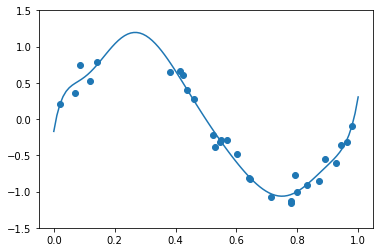

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

# LinearRegression
poly = PolynomialFeatures(9)
model_lr = make_pipeline(poly, LinearRegression())
model_lr.fit(X, y)
print(model_lr.steps[1][1].coef_)

xx = np.linspace(0, 1, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)

plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


(-1.5, 1.5)

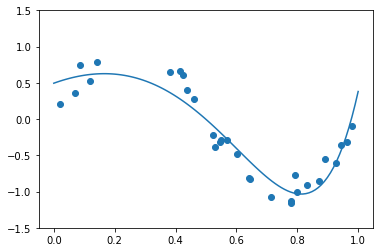

In [22]:
# Ridge Regression
poly = PolynomialFeatures(9)
model_ridge = make_pipeline(poly, Ridge(alpha=0.01))
model_ridge.fit(X, y)
print(model_ridge.steps[1][1].coef_)

xx = np.linspace(0, 1, 100)
y_pred = model_ridge.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)

plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


(-1.5, 1.5)

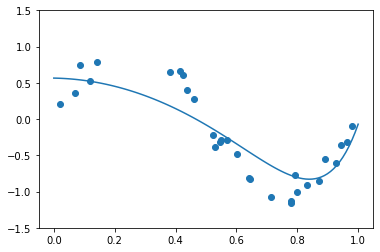

In [23]:
# Lasso Regression
poly = PolynomialFeatures(9)
model_lasso = make_pipeline(poly, Lasso(alpha=0.01))
model_lasso.fit(X, y)
print(model_lasso.steps[1][1].coef_)

xx = np.linspace(0, 1, 100)
y_pred = model_lasso.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)

plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

[ 0.         -0.83086118 -1.0910272  -0.72958742 -0.26054671  0.
  0.25162626  0.4866751   0.6520339   0.76389789]


(-1.5, 1.5)

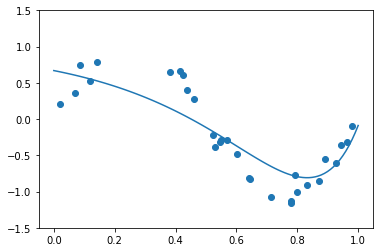

In [24]:
# ElasticNet Regression
poly = PolynomialFeatures(9)
model_elnet = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.1))
model_elnet.fit(X, y)
print(model_elnet.steps[1][1].coef_)

xx = np.linspace(0, 1, 100)
y_pred = model_elnet.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)

plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

#### LinearRegression 실습 05

붓꽃 데이터 셋에 선형회귀 적용

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

#sepal 꽃밭침
#petal 꽃잎
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

꽃받침 길이와 꽂잎 길이를 이용한 선형회귀

In [26]:
# 꽃받침 길이
# 꽃잎 길이
X = iris.data[:, 0]
y = iris.data[:, 2]

In [27]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),
                                                    y,
                                                    random_state=3)

X_train.shape

(112, 1)

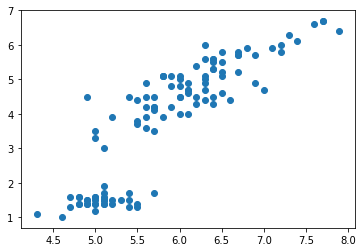

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 
plt.scatter(X_train, y_train)

In [29]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7591843019680293, 0.7508373803708501)

In [30]:
# 계수(가중치)와 절편
model.coef_, model.intercept_

(array([1.93673712]), -7.512721905922389)

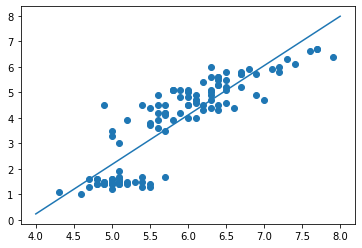

In [31]:
# 결과 시각화
import numpy as np

xx = np.linspace(4, 8, 100)
y_pred = model.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(X_train, y_train)

꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [32]:
# 꽃잎 길이
# 꽃잎 너비
iris.feature_names
X = iris.data[:, 2]
y = iris.data[:, 3]

In [33]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),
                                                    y,
                                                    random_state=3)

X_train.shape

(112, 1)

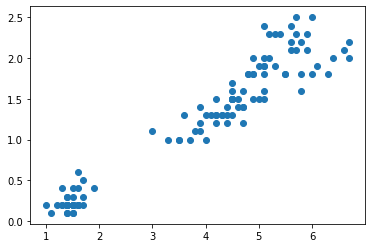

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 
plt.scatter(X_train, y_train)

In [35]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9253418194107981, 0.9309332612136965)

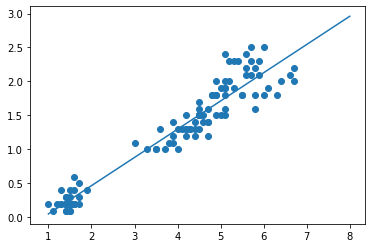

In [36]:
# 결과 시각화
import numpy as np

xx = np.linspace(1, 8, 100)
y_pred = model.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(X_train, y_train)

In [37]:
# 테스트 셋을 사용한 평가
model.predict(X_test)

array([0.2163748 , 0.25794608, 0.25794608, 0.29951735, 0.25794608,
       2.50279515, 1.29722805, 0.2163748 , 1.96236852, 1.46351317,
       1.33879933, 0.17480352, 1.29722805, 1.29722805, 1.96236852,
       0.17480352, 1.67136957, 2.17022491, 1.71294084, 0.17480352,
       1.62979829, 1.92079724, 1.75451212, 1.62979829, 0.34108863,
       2.17022491, 1.96236852, 1.33879933, 1.0062291 , 1.58822701,
       0.13323224, 0.42423119, 1.87922596, 1.54665573, 0.2163748 ,
       0.25794608, 1.71294084, 0.17480352])

In [38]:
print("훈련 세트 점수: {:.2f}".format( model.score(X_train, y_train) ))
print("테스트 세트 점수: {:.2f}".format( model.score(X_test, y_test) ))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.93


In [39]:
# 규제모델 적용해보기

장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.
- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.


모델 정규화(Regularization, 규제)을 통해 과대적합을 제어